# Task 1: Data wrangling
### 1. Loading the COVID data set and exploreing the data. 

In [1]:
#import needed packages
import pandas as pd

In [2]:
#loading data
covid = pd.read_csv('data/time_series_covid19_deaths_global.csv')

#removing long and lat since it is stated in the assignment that we can ignore these columns as they will not be used
covid.drop(columns = ['Lat', 'Long'], axis = 1, inplace = True) 

#looking at the data
covid.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


### 1. Makeing sure that the structure and content of the data set is understood, such as the data types, missing values, and unique countries observed etc.

In [3]:
#checking data types
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1145 entries, Province/State to 3/9/23
dtypes: int64(1143), object(2)
memory usage: 2.5+ MB


In [4]:
#chekcing missing values
covid.isna().sum()

Province/State    198
Country/Region      0
1/22/20             0
1/23/20             0
1/24/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1145, dtype: int64

In [5]:
#checking unique countries observed
print(covid['Country/Region'].nunique())
print(covid['Country/Region'].unique())

201
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jam

### 2. Reshapeing the data from wide to long so that dates are in a single column (i.e., tidy format). 

In [6]:
#reshaping data
covid_long = covid.melt(
    id_vars = ['Province/State', 'Country/Region'], 
    var_name = 'Date', # Name of new column with old column labels
    value_name = 'Deaths'  # Name of new column with old column values
)

#checking the data format
covid_long.head()

,Province/State,Country/Region,Date,Deaths
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0


### 3. Converting dates to timestamps with the correct date format.

In [7]:
#converting dates to timestamps that was previosly in a integer format
covid_long['Date'] = pd.to_datetime(covid_long['Date'], format='%m/%d/%y')

#checking the date has changed to dateformat
covid_long.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  104013 non-null  object        
 1   Country/Region  330327 non-null  object        
 2   Date            330327 non-null  datetime64[ns]
 3   Deaths          330327 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 10.1+ MB


### 4. Aggregating the data to the country-level and summing up deaths across province/state in each country on each day. 

In [8]:
#aggregating the data to contry level and summing up deaths across province/state in each country on each day
covid_country = covid_long.groupby(['Country/Region', 'Date'], as_index=False)['Deaths'].sum()

#checking the data format
covid_country.head() 

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


### 5. The data contains the cumulative sum of deaths over time. Create a new column that contains the daily number of new deaths in each country on each day.

In [9]:
#makeing sure the data is sorted by country and date 
covid_country = covid_country.sort_values(['Country/Region', 'Date'])

#creating  daily new deaths for each country
covid_country['Daily_Deaths'] = covid_country.groupby('Country/Region')['Deaths'].diff()

#checking result
covid_country.head() 

,Country/Region,Date,Deaths,Daily_Deaths
0,Afghanistan,2020-01-22,0,NaN
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0


In [10]:
#replacing NaN with 0 for the first day for each country
covid_country['Daily_Deaths'] = covid_country['Daily_Deaths'].fillna(0)

#checking result
covid_country.head() 

,Country/Region,Date,Deaths,Daily_Deaths
0,Afghanistan,2020-01-22,0,0.0
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0


# Task 2: Data visualization

### 1. Using the final data from the previous task with total and new deaths, produce the following two visualizations:

In [11]:
#import needed packages
import matplotlib.pyplot as plt

plt.style.use('ggplot') # Set default style for plots


a) A single graph that contains line plots of total deaths over time for the three countries with the highest total number of COVID-19 deaths in the data. Save the graph as “total_deaths.png”.

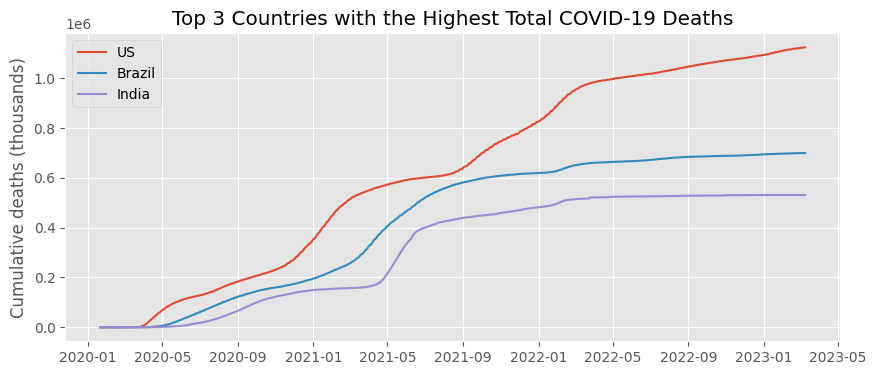

In [12]:
#finding the latest date
latest_date = covid_country['Date'].max()

#get the cumulative sum of deaths for each country on the latest date
total_deaths = covid_country[covid_country['Date'] == latest_date].groupby('Country/Region')['Deaths'].sum().sort_values(ascending = False)

#storing the country names of top 3 countries on total deats
top3 = total_deaths.head(3).index.tolist()


#creating the plot
fig, ax = plt.subplots(figsize = (10, 4))

for country in top3:
    subset = covid_country[covid_country['Country/Region'] == country]
    plt.plot(subset['Date'], subset['Deaths'], label = country)

plt.title('Top 3 Countries with the Highest Total COVID-19 Deaths')
plt.ylabel('Cumulative deaths (thousands)')
plt.legend()

#saveing the graph
plt.savefig("total_deaths.png", dpi = 500, bbox_inches = 'tight')

#show graph
plt.show()

b) A figure with three subplots that show the daily number of new deaths for Norway, Denmark and Sweden. Save the graph as “new_deaths.png”.

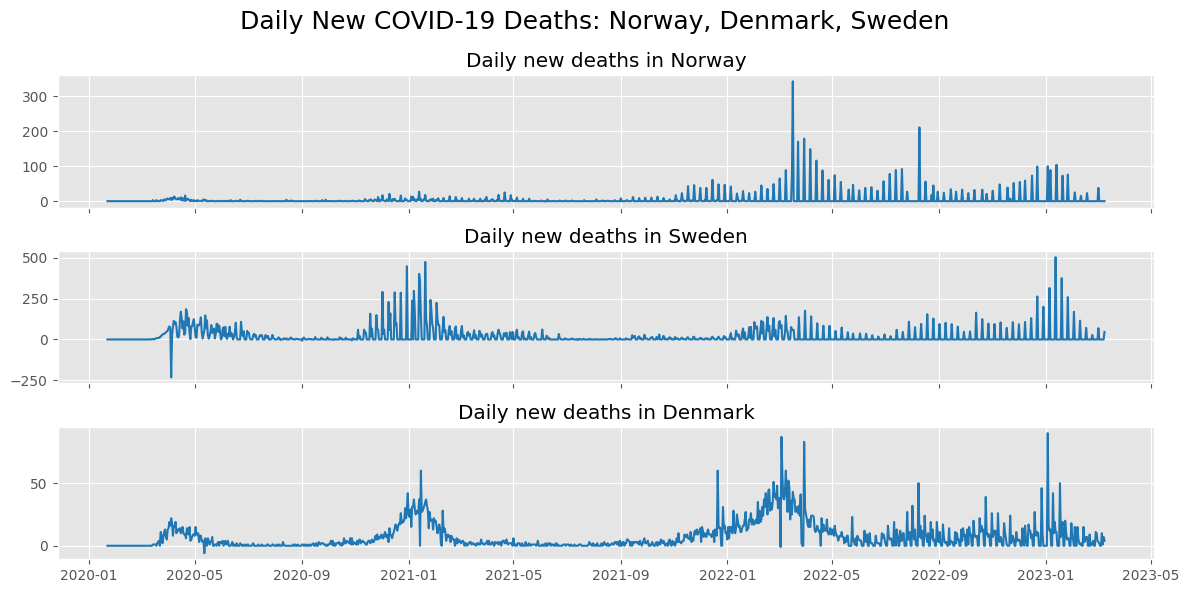

In [13]:
# Create a 3x1 subplot layout
fig, axes = plt.subplots(3, 1, figsize = (12, 6), sharex = True)

scandinavia = ['Norway', 'Sweden', 'Denmark']


# "Flatten" axes objects into a list
faxes = axes.ravel()

for i in range(len(faxes)):
    
    # Extract closing price for stock at index i
    subset = covid_country[covid_country['Country/Region'] == scandinavia[i]].sort_values('Date').set_index('Date')

    # Line chart for a ticker and ax object
    faxes[i].plot(subset['Daily_Deaths'], color = 'tab:blue')
    faxes[i].set_title(f'Daily new deaths in {scandinavia[i]}')
    ax.set_ylabel('Deaily deaths')
    #faxes[i].tick_params(axis = 'x', labelrotation = 45)

# Add title to figure
fig.suptitle('Daily New COVID-19 Deaths: Norway, Denmark, Sweden', fontsize = 18)

plt.tight_layout() # Use this command to automatically adjust the space between subplots

#saveing the graph
plt.savefig("new_deaths.png", dpi = 500, bbox_inches = 'tight')

#showing the garph
plt.show()

# Task 3: Data merging

### 1. Loading and exploring the new data set

In [14]:
#loading data
continents = pd.read_csv('data/Countries Continents.csv') 

#looking at the data
continents.head()

,Entity,Year,Countries Continents
0,Abkhazia,2015,Asia
1,Afghanistan,2015,Asia
2,Akrotiri and Dhekelia,2015,Asia
3,Albania,2015,Europe
4,Algeria,2015,Africa


In [15]:
#rename the columns in the dataset for better readability
continents = continents.rename(columns = {'Entity':'Country/Region', 'Countries Continents':'Continents'})

#checking the result
continents.head()

,Country/Region,Year,Continents
0,Abkhazia,2015,Asia
1,Afghanistan,2015,Asia
2,Akrotiri and Dhekelia,2015,Asia
3,Albania,2015,Europe
4,Algeria,2015,Africa


In [16]:
#checking data types
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  285 non-null    object
 1   Year            285 non-null    int64 
 2   Continents      285 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.8+ KB


In [17]:
#chekcing missing values
continents.isna().sum()

Country/Region    0
Year              0
Continents        0
dtype: int64

In [18]:
#checking unique countries observed
print(continents['Country/Region'].nunique())
print(continents['Country/Region'].unique())

285
['Abkhazia' 'Afghanistan' 'Akrotiri and Dhekelia' 'Albania' 'Algeria'
 'American Samoa' 'Andorra' 'Angola' 'Anguilla' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Austria-Hungary' 'Azerbaijan' 'Baden' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Bavaria' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Bouvet Island' 'Brazil'
 'British Indian Ocean Territory' 'British Virgin Islands' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Christmas Island' 'Cocos Islands'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Czechoslovakia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Germany' 'Ecuador' 'Egypt' 'El 

The task had a note which said: "There are slight name variations across the two data sets. For example, “US” vs “United States” and “Korea, South” vs “South Korea”. To improve the merge quality, you can update these country names in one of the data sets so
that they match".

I found it difficult to interpet what the note wanted me to do. One could either interpet it as: "find all the different countries across the two dataset and find the countries that is the same, and give them the same name". Or, on could interpet it as: "change "US" vs "United States" and "Korea, South" vs "South Korea". Since it says "you can update these country names". I choose to do the latter interpetation, because I could not find out how I could distinguish between one country exists in both datsets but do not have the same name and if one country is just missing in the other dataset.  

In [19]:
#changing the same countries to have the same country name
covid_country['Country/Region'] = covid_country['Country/Region'].replace({'US': 'United States','Korea, South': 'South Korea'})

### 2. Perform a left join to add the continent information to your data on covid deaths.

In [20]:
covid_country = pd.merge(covid_country, continents, how = 'left')

#dropping the Year column for continents data since it only contains 2015. 
#it does not make sense including the year in the new dataframe
covid_country = covid_country.drop(columns=['Year'])

#checking the result
covid_country

,Country/Region,Date,Deaths,Daily_Deaths,Continents
0,Afghanistan,2020-01-22,0,0.0,Asia
1,Afghanistan,2020-01-23,0,0.0,Asia
2,Afghanistan,2020-01-24,0,0.0,Asia
3,Afghanistan,2020-01-25,0,0.0,Asia
4,Afghanistan,2020-01-26,0,0.0,Asia
...,...,...,...,...,...
229738,Zimbabwe,2023-03-05,5668,0.0,Africa
229739,Zimbabwe,2023-03-06,5668,0.0,Africa
229740,Zimbabwe,2023-03-07,5668,0.0,Africa
229741,Zimbabwe,2023-03-08,5671,3.0,Africa


Verifying that most countries now have a valid continent value and counting how many countries that are missing continent data.

In [21]:
covid_country.isna().sum()

Country/Region        0
Date                  0
Deaths                0
Daily_Deaths          0
Continents        16002
dtype: int64

It is only 16 002 missing countries out of 229 743 (6.97%). In reality it is even fewer countries missing continents, since one country name is repeated in the 'Country/Region' column for each day recorded in the dataset.

### 3. Using the merged data, calculate the total number of deaths per continent. Which continent had the highest number of COVID-19 deaths in total?

In [22]:
total_deaths_continent = covid_country[covid_country['Date'] == latest_date].groupby('Continents')['Deaths'].sum().sort_values(ascending = False)

#checking the result
total_deaths_continent.head()

top1_continent = total_deaths_continent.head(1).index[0]

#continent that had the highest number of COVID-19 deaths in total
print(f'The continent that had the highest number of COVID-19 deaths in total: {top1_continent}')

The continent that had the highest number of COVID-19 deaths in total: Europe


### 4. Create a bar plot that shows the total number of COVID-19 deaths per continent. Save the graph as “continent_bar_plot.png” .

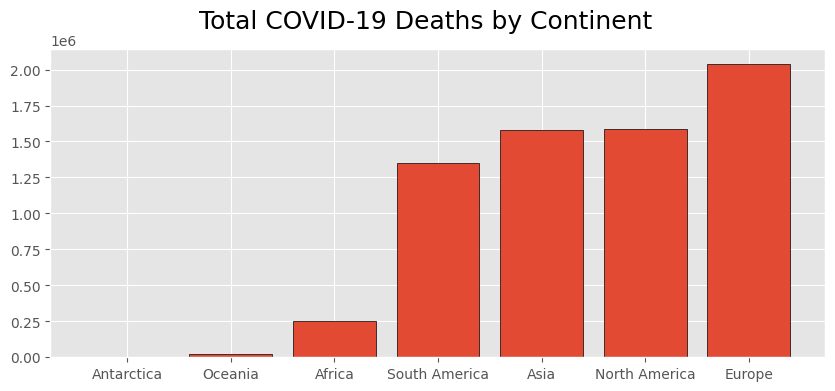

In [23]:
#fig, ax = plt.subplots()
pvalues = covid_country.groupby("Continents")["Deaths"].sum()

pvalues = covid_country[covid_country['Date'] == latest_date].groupby('Continents')['Deaths'].sum().sort_values(ascending=True)

fig, ax = plt.subplots(figsize = (10, 4))

ax.bar(pvalues.index, pvalues, edgecolor = 'black')

# Add title to figure
fig.suptitle('Total COVID-19 Deaths by Continent', fontsize = 18)

#saveing the graph
plt.savefig("continent_bar_plot.png", dpi = 500, bbox_inches = 'tight')

plt.show()

## AI regulation disclosure
I have used generative AI to find out:
* How I can convert the names of the top 3 countries with most deaths to a list
* What the color is called for the plot 'Daily New COVID-19 Deaths: Norway, Denmark, Sweden'